# Dimensionality reduction - PCA, TSNE on MNIST Dataset

* MNIST dataset information
* Application of PCA - own implementation (without using scikit learn)
* Application of PCA - implementation using scikit learn
* Application of TSNE

# MNIST data information

dataset link : https://www.kaggle.com/c/digit-recognizer/data
* A large database of handwritten digits that is commonly used for training various image processing systems.
* Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. 
* Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker.
* This pixel-value is an integer between 0 and 255, inclusive.


In [45]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# loading the dataset   
data = pd.read_csv('mnist_train.csv')

In [46]:
# printing first few rows of the data
data.head

<bound method NDFrame.head of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pi

In [47]:
# drop the label feature and store the pixel data in d.
pixel_data = data.drop("label",axis=1)

# save the labels into a variable lables
labels = data['label']


In [48]:
# printing the shapes of the dataframes
print("The shape of pixel dataframe",pixel_data.shape)
print("The shape of labels dataframe",labels.shape)

The shape of pixel dataframe (42000, 784)
The shape of labels dataframe (42000,)


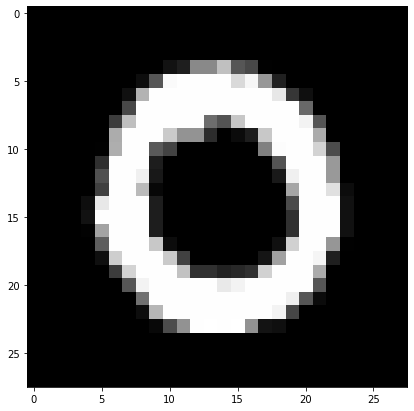

In [49]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 1
grid_data = pixel_data.iloc[idx].values.reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()


#  2D Visualization using PCA - without using scikit learn

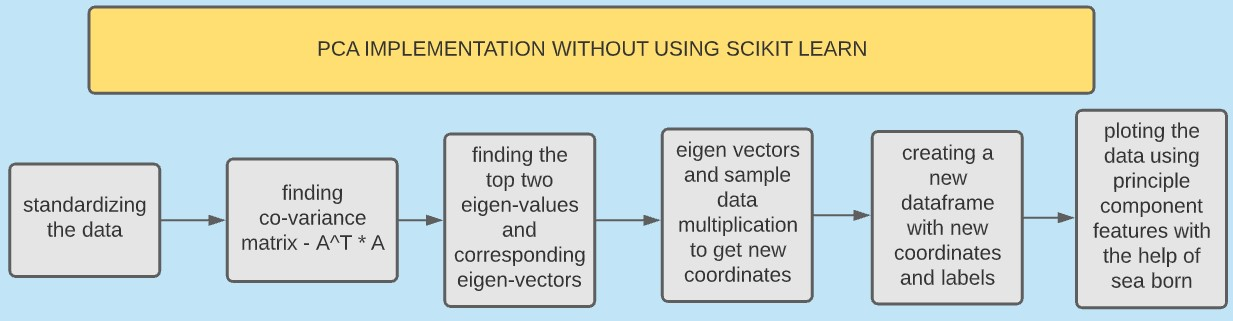

In [50]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)


(42000, 785)


In [51]:
#find the co-variance matrix - A^T * A
data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(data.T , data)

print ( "The shape of variance matrix = ", covar_matrix.shape)


The shape of variance matrix =  (785, 785)


In [52]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh 

values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)

# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (785, 2)
Updated shape of eigen vectors =  (2, 785)


In [34]:
# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.

import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, data.T)

print (" resultanat new data points' shape ", vectors.shape, "X", data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 785) X (785, 42000)  =  (2, 42000)


In [35]:
import pandas as pd

# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_pca_feature", "2nd_pca_feature", "label"))
print(dataframe.head())

   1st_pca_feature  2nd_pca_feature  label
0        -3.834079         5.498016    1.0
1        -1.533175        -6.018994    0.0
2        -2.425707         1.959875    1.0
3        -2.284497        -5.716447    4.0
4        -1.153826        -6.049490    0.0


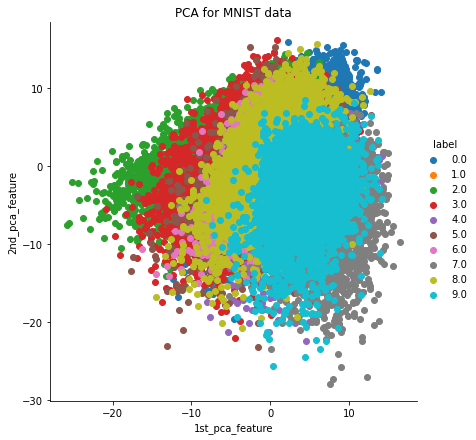

In [36]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", height=6).map(plt.scatter, '1st_pca_feature', '2nd_pca_feature').add_legend()
plt.title("PCA for MNIST data")
plt.show()

# PCA using Scikit-Learn

In [38]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()


In [39]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)



shape of pca_reduced.shape =  (42000, 2)


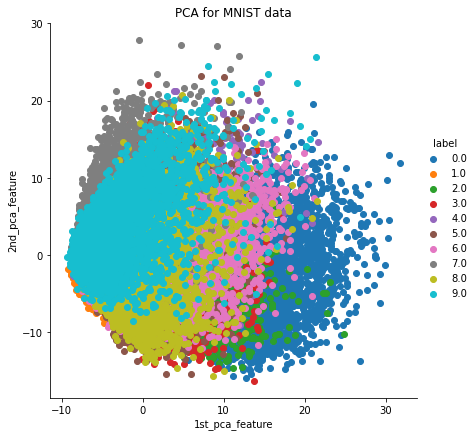

In [40]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=('1st_pca_feature', '2nd_pca_feature', "label"))
sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_pca_feature', '2nd_pca_feature').add_legend()
plt.title("PCA for MNIST data")
plt.show()

# PCA for dimensionality redcution (not for visualization)

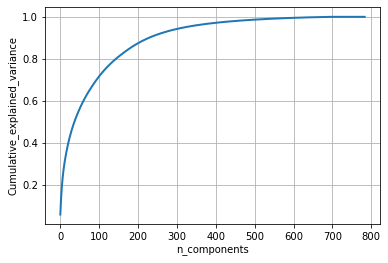

In [41]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

### observtion
* If we take 200-dimensions, approx. 90% of variance is expalined.

# t-SNE using Scikit-Learn

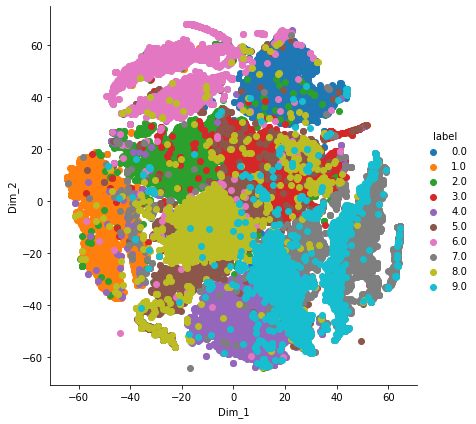

In [42]:
# TSNE
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

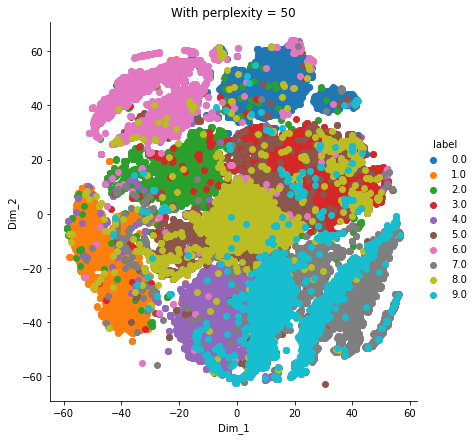

In [96]:
# TSNE with perplexity with 50
model = TSNE(n_components=2, random_state=0, perplexity=40)
tsne_data = model.fit_transform(data) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

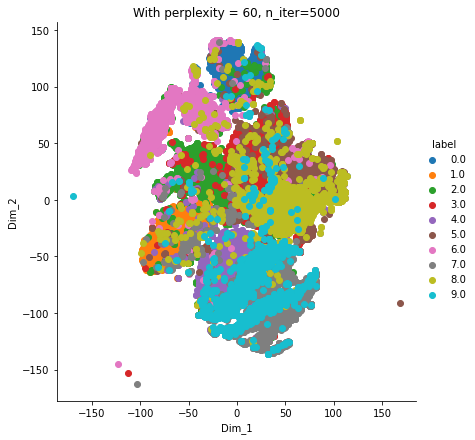

In [95]:
# TSNE with perplexity with 80, iterations = 5000
model = TSNE(n_components=2, random_state=0, perplexity=70,  n_iter=5000)
tsne_data = model.fit_transform(data) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 60, n_iter=5000')
plt.show()

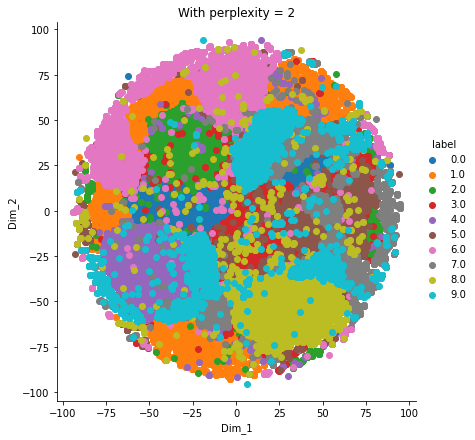

In [91]:
# TSNE with perplexity with 2
model = TSNE(n_components=2, random_state=0, perplexity=2)
tsne_data = model.fit_transform(data) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 2')
plt.show()

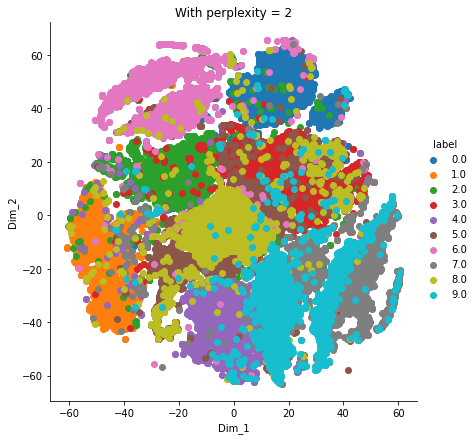

In [44]:
# TSNE with perplexity with 35
model = TSNE(n_components=2, random_state=0, perplexity=35)
tsne_data = model.fit_transform(data) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 2')
plt.show()